In [ ]:

import pandas as pd

df_populacao = pd.read_csv("populacao.csv")

df_populacao.head()


,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.


In [ ]:
# o código a seguir conta o número de pessoas fluentes,
# calcula a proporção delas em relação ao total da amostra,
# e então calcula a probabilidade complementar para determinar a proporção de pessoas que não são fluentes.

total_pessoas = df_populacao.shape[0]
# calcula o número total de pessoas na amostra.
# df_populacao.shape[0] retorna o número de linhas no DataFrame,
# que neste caso representa o total de pessoas.

pessoas_fluentes = df_populacao[df_populacao['nível de proficiência em inglês'] == 'Avançado'].shape[0]
# filtrando o DataFrame para incluir apenas as pessoas que são fluentes em inglês,
# considerando como fluentes aquelas com nível de proficiência 'Avançado'.
# df_populacao['nível de proficiência em inglês'] == 'Avançado' cria uma série de valores booleanos (True/False),
# onde True corresponde às linhas em que a pessoa é fluente em inglês.
# df_populacao[...] usa essa série para filtrar o DataFrame. .shape[0] então conta o número de linhas resultantes,
# que é o número de pessoas fluentes em inglês na amostra.

probabilidade_fluente = pessoas_fluentes / total_pessoas
# calcula a probabilidade de uma pessoa escolhida aleatoriamente ser fluente em inglês
# divide o número de pessoas fluentes pelo total de pessoas na amostra.

probabilidade_nao_fluente = 1 - probabilidade_fluente
# calcula a probabilidade complementar
# que seria a probabilidade de uma pessoa escolhida aleatoriamente não ser fluente em inglês.
# Isso é feito subtraindo a probabilidade de ser fluente (probabilidade_fluente) de 1.
# O resultado é a probabilidade de não ser fluente em inglês.

probabilidade_nao_fluente


0.656

2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?


In [ ]:
# calcular a probabilidade complementar de ser fluente em inglês

total_pessoas = df_populacao.shape[0]
# define o total de pessoas na amostra, obtido pelo número de linhas (shape[0]) no DataFrame df_populacao

pessoas_fluentes = df_populacao[df_populacao['nível de proficiência em inglês'] == 'Avançado'].shape[0]
# conta quantas pessoas são classificadas como fluentes em inglês (nível 'Avançado')
# filtrando o DataFrame e então contando as linhas resultantes.

probabilidade_fluente = pessoas_fluentes / total_pessoas
# calcula a fração de pessoas fluentes em inglês, dividindo o número de fluentes pelo total de pessoas na amostra

probabilidade_nao_fluente = 1 - probabilidade_fluente
# determina a probabilidade complementar,
# ou seja, a probabilidade de uma pessoa não ser fluente, subtraindo a probabilidade de ser fluente de 1.

probabilidade_nao_fluente


0.656

3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?


In [ ]:
# filtrando pessoas de Alagoas ou Pará
pessoas_AL_PA = df_populacao[(df_populacao['estado'] == 'AL') | (df_populacao['estado'] == 'PA')]
# Cria um subconjunto do DataFrame original
# (df_populacao) contendo apenas as pessoas
# dos estados de Alagoas ('AL') ou Pará ('PA'), usando o operador | (ou) para combinar as condições

# calculando a probabilidade de ter renda superior a 5 mil reais
pessoas_renda_superior_5mil = pessoas_AL_PA[pessoas_AL_PA['renda'] > 5000].shape[0]
# Conta o número de pessoas dentro do subconjunto pessoas_AL_PA
# que têm uma renda superior a 5 mil reais, filtrando por renda
# e depois contando o número de linhas resultantes

probabilidade_renda_superior_5mil = pessoas_renda_superior_5mil / pessoas_AL_PA.shape[0]
# calcula a probabilidade de uma pessoa, selecionada aleatoriamente desse subconjunto de
# pessoas de Alagoas ou Pará, ter uma renda superior a 5 mil reais. Isso é feito dividindo o número de pessoas
# com renda superior a 5 mil pelo número total de pessoas nos dois estados (Alagoas e Pará) na amostra.


probabilidade_renda_superior_5mil


0.05063291139240506

4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?

In [ ]:
pessoas_AM = df_populacao[df_populacao['estado'] == 'AM']
# filtra o DataFrame df_populacao para incluir apenas as pessoas do estado do Amazonas ('AM').

pessoas_ensino_superior_AM = pessoas_AM[pessoas_AM['escolaridade'] == 'Superior'].shape[0]
# dentro do subconjunto de pessoas do Amazonas, conta quantas têm ensino superior completo ('Superior')

probabilidade_ensino_superior_AM = pessoas_ensino_superior_AM / pessoas_AM.shape[0]
# Calcula a probabilidade de uma pessoa, escolhida aleatoriamente do subconjunto do Amazonas,
# ter ensino superior completo.
# A probabilidade é obtida dividindo o número de pessoas com ensino superior pelo total de pessoas
# no subconjunto do Amazonas.

probabilidade_quinta_pessoa_superior_AM = 1 - (1 - probabilidade_ensino_superior_AM)**5
# Calcula a probabilidade de, ao falar com cinco pessoas do Amazonas aleatoriamente, pelo menos uma ter ensino
# superior completo. Usa o princípio da probabilidade complementar,
# subtraindo de 1 a probabilidade de todas as cinco pessoas não terem ensino superior completo.

probabilidade_ensino_superior_AM, probabilidade_quinta_pessoa_superior_AM


(0.23684210526315788, 0.7411357921270514)

In [ ]:
# definir as faixas de renda de 1500 em 1500
faixas_renda = pd.cut(df_populacao['renda'], bins=range(0, int(df_populacao['renda'].max()) + 1500, 1500))
# pd.cut() é uma função do pandas para segmentar e classificar os dados em faixas (bins).
# df_populacao['renda'] é a coluna 'renda' do DataFrame df_populacao.
# bins=range(0, int(df_populacao['renda'].max()) + 1500, 1500), cria faixas (bins) de renda
# de 0 até o valor máximo de renda mais 1500, com intervalos de 1500

# cálculo da densidade de cada faixa de renda
densidade_renda = faixas_renda.value_counts(normalize=True).sort_index()
# value_counts(normalize=True) para contar a ocorrência de cada
# faixa e normaliza os resultados para obter proporções
# sort_index() garante que os resultados estejam ordenados de acordo com o índice,
# que neste caso são as faixas de renda

# faixa de renda com maior densidade:
faixa_maior_densidade = densidade_renda.idxmax()
densidade_renda, faixa_maior_densidade
# idxmax() retorna o índice (neste caso, a faixa de renda) com o valor máximo,
# ou seja, a faixa de renda mais comum entre os registros.
# densidade_renda, faixa_maior_densidade exibe as densidades calculadas para cada faixa
# e a faixa de renda que possui a maior densidade


((0, 1500]       0.055
 (1500, 3000]    0.414
 (3000, 4500]    0.442
 (4500, 6000]    0.089
 Name: renda, dtype: float64,
 Interval(3000, 4500, closed='right'))

5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.

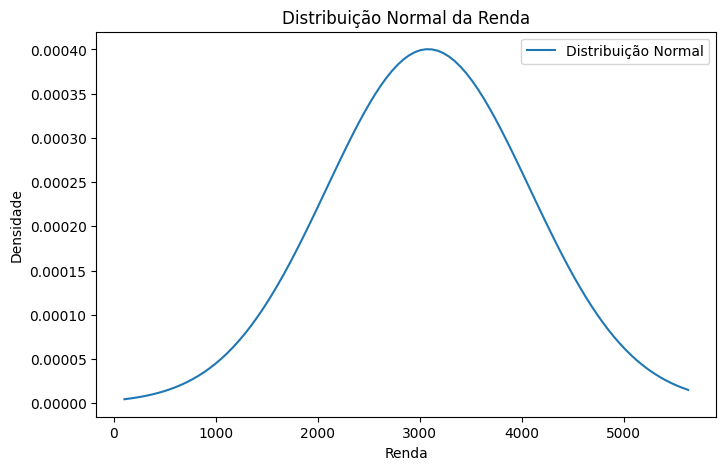

(3082.5371800000003, 993156.2281676152)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# cálculo da média e a variância da renda
media_renda = df_populacao['renda'].mean()
variancia_renda = df_populacao['renda'].var()

# gerar a distribuição normal da renda
x = np.linspace(df_populacao['renda'].min(), df_populacao['renda'].max(), 100)
# gera 'num' pontos igualmente espaçados entre start e stop
y = norm.pdf(x, media_renda, np.sqrt(variancia_renda))
# calcula a densidade de probabilidade da distribuição normal para um valor x,
# com média loc e desvio padrão scale

# plotando a distribuição normal da renda
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Distribuição Normal')
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade')
plt.legend()
plt.show()

media_renda, variancia_renda





6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
pessoas_pos_graduacao = df_populacao[df_populacao['escolaridade'] == 'Pós-graduação'].shape[0]
# filtrar pessoas com pós-graduaçãoe shape[0] obtém o número total dessas pessoas

probabilidade_pos_graduacao = pessoas_pos_graduacao / total_pessoas
# calcula a proporção de pessoas com pós-graduação

# população total de 1 milhão
populacao = 1000000

# calculando a probabilidade de encontrar 243 mil pessoas com pós-graduação
n = 243000  # número desejado de pessoas com pós-graduação
probabilidade = binom.pmf(n, populacao, probabilidade_pos_graduacao)
# calcula a probabilidade (pmf - probability mass function) de exatamente k sucessos em n tentativas,
# com a probabilidade de sucesso em cada tentativa sendo p.
# Aqui, 'k' é 243000, 'n' é 1 milhão, e 'p' é a probabilidade de uma pessoa ter pós-graduação calculada anteriormente.

probabilidade


1.1104854289794913e-119

7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [ ]:
densidade_escolaridade = df_populacao['escolaridade'].value_counts(normalize=True).sort_index()
# df_populacao['escolaridade']: Acessa a coluna 'escolaridade' do DataFrame.
# value_counts(normalize=True): Conta a frequência de cada valor único na coluna, com normalize=True convertendo contagens em proporções.
# sort_index(): Ordena os resultados pela etiqueta do índice, que neste caso são os níveis de escolaridade

densidade_acumulada_escolaridade = densidade_escolaridade.cumsum()
# cumsum(): Calcula a soma acumulada das proporções de 'densidade_escolaridade',
# fornecendo a densidade acumulada ao longo dos níveis de escolaridade.

densidade_acumulada_escolaridade
# contém a função de densidade acumulada para os níveis de escolaridade,
# indicando a proporção total de indivíduos com até um certo nível de escolaridade




Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: escolaridade, dtype: float64

8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?

In [ ]:
# proporção de pessoas com nível de inglês intermediário
proporcao_intermediario = df_populacao[df_populacao['nível de proficiência em inglês'] == 'Intermediário'].shape[0] / total_pessoas
# df_populacao[...] == 'Intermediário': Filtra a coluna específica por registros igual a 'Intermediário'
# .shape[0]: Conta o número de registros filtrados
# / total_pessoas: Divide pela contagem total para obter a proporção

# calculando a margem de erro para um nível de confiança de 95%
z_score = norm.ppf(0.975)  # Z-score para 95% de confiança
# retorna o Z-score que acumula até 97,5% da distribuição normal,
# adequado para um intervalo de confiança de 95% (considerando duas caudas)

margem_erro_intermediario = z_score * np.sqrt((proporcao_intermediario * (1 - proporcao_intermediario)) / total_pessoas)
# np.sqrt calcula a raiz quadrada:
# (proporcao_intermediario * (1 - proporcao_intermediario)): Produto da proporção pelo seu complemento
# / total_pessoas: Divide pelo tamanho da amostra para ajustar a fórmula da margem de erro
# z_score * ...: Multiplica a raiz quadrada pela Z-score para obter a margem de erro

margem_erro_intermediario
# representa a margem de erro para a proporção de pessoas
# com inglês intermediário, considerando um nível de confiança de 95%..

0.029121068108804226

9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?


In [ ]:
# calculando a média da renda da população
media_renda = df_populacao['renda'].mean()
# mean() calcula a média de uma série de números

# calculando a proporção de pessoas com renda mil reais superior à média
proporcao_mil_acima_media = df_populacao[df_populacao['renda'] > (media_renda + 1000)].shape[0] / total_pessoas
# df_populacao['renda'] > (media_renda + 1000): Filtra os registros cuja renda supera a média em mais de R$1000
# .shape[0]: Conta o número de registros que atendem ao critério
# / total_pessoas: Divide pelo número total de registros para obter a proporção

# usando a distribuição binomial para calcular a probabilidade de encontrar 60 pessoas com renda mil reais acima da média em uma amostra de 60 pessoas
probabilidade_60_mil_acima = binom.pmf(60, 60, proporcao_mil_acima_media)
# binom.pmf(k, n, p): Função que retorna a probabilidade de obter exatamente
# 'k' sucessos em 'n' tentativas independentes, com p sendo a probabilidade de
# sucesso em cada tentativa. Neste caso, k e n são ambos 60, significando que
# se busca a probabilidade de todos os 60 indivíduos em uma amostra de 60 terem renda mil reais acima da média


probabilidade_60_mil_acima


2.5677489595221674e-48

10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [ ]:
# filtrando pessoas do Sudeste que são homens, com ensino fundamental e renda maior que 2 mil reais
pessoas_sudeste_homem_fundamental_renda_maior_2mil = df_populacao[
    (df_populacao['estado'].isin(['SP', 'RJ', 'MG', 'ES'])) &
    # verifica se o valor na coluna 'estado' está dentro da lista fornecida (estados do Sudeste)
    (df_populacao['sexo'] == 'M') &
    (df_populacao['escolaridade'] == 'Fundamental') &
    (df_populacao['renda'] > 2000)
]
# &: Operador lógico "E", usado para combinar múltiplas condições
# .shape[0]: Conta o número de registros que atendem a todas as condições especificadas

# calculando a proporção dessas pessoas em relação ao total
proporcao_sudeste_homem_fundamental_renda_maior_2mil = pessoas_sudeste_homem_fundamental_renda_maior_2mil.shape[0] / total_pessoas

# total_pessoas: Variável que armazena o número total de registros no DataFrame original 'df_populacao'
# proporcao_sudeste_homem_fundamental_renda_maior_2mil: Armazena o resultado do cálculo da proporção

proporcao_sudeste_homem_fundamental_renda_maior_2mil


0.019